In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [5]:
df = pd.read_csv('vaccination_tweets.csv')

In [6]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [7]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3945 entries, 0 to 3944
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                3945 non-null   int64 
 1   user_name         3945 non-null   object
 2   user_location     3119 non-null   object
 3   user_description  3698 non-null   object
 4   user_created      3945 non-null   object
 5   user_followers    3945 non-null   int64 
 6   user_friends      3945 non-null   int64 
 7   user_favourites   3945 non-null   int64 
 8   user_verified     3945 non-null   bool  
 9   date              3945 non-null   object
 10  text              3945 non-null   object
 11  hashtags          2934 non-null   object
 12  source            3944 non-null   object
 13  retweets          3945 non-null   int64 
 14  favorites         3945 non-null   int64 
 15  is_retweet        3945 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 439.3+ KB


In [10]:
df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,3.945000e+03,3.945000e+03,3945.000000,3945.000000,3945.000000,3945.000000
mean,1.344516e+18,4.491847e+04,1134.389861,13708.680355,1.792395,10.718124
std,4.130508e+15,3.848479e+05,2320.324579,41052.670260,15.707931,69.374656
min,1.337728e+18,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.340648e+18,1.130000e+02,166.000000,383.000000,0.000000,0.000000
50%,1.344758e+18,4.880000e+02,458.000000,1882.000000,0.000000,1.000000
75%,1.348051e+18,2.238000e+03,1191.000000,9889.000000,1.000000,5.000000
max,1.351436e+18,1.371493e+07,64441.000000,924667.000000,688.000000,2129.000000


# Data Engineering and Data Cleaning

Text(0.5, 1.0, 'Missing Values Exploration by Columns')

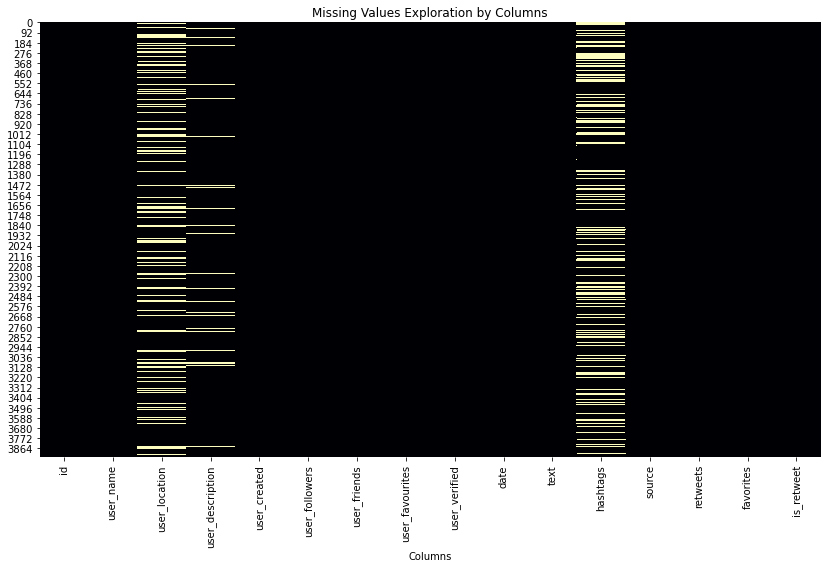

In [16]:
plt.figure(figsize=(14,8))
sns.heatmap(df.isnull(),cbar=False,cmap='magma')
plt.xlabel('Columns')
plt.title('Missing Values Exploration by Columns')

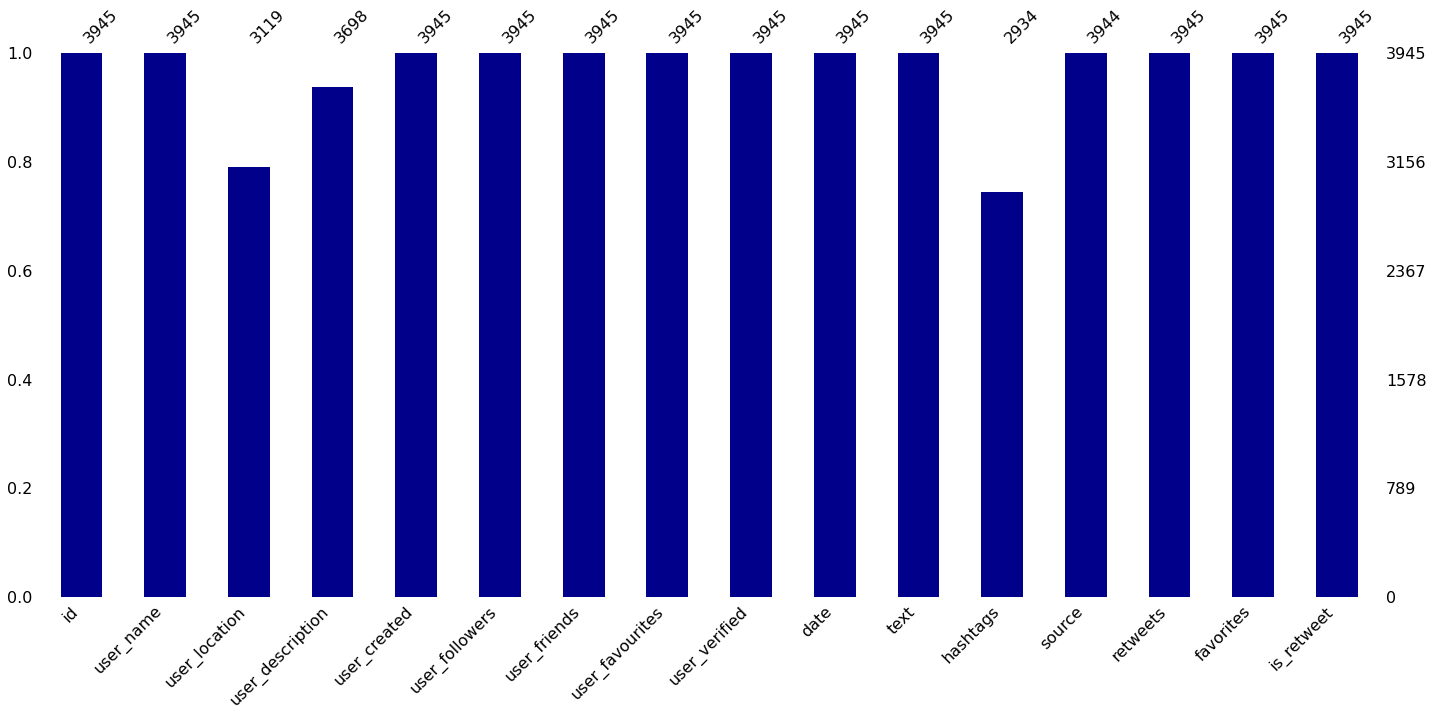

In [18]:
msno.bar(df,color='darkblue')

# Dealing with Missing Columns: user_location, user_description & Hashtags

In [19]:
df['user_location'].count()

3119

In [20]:
df['user_location'].nunique()

1288

In [21]:
df['user_location'].unique()

array(['La Crescenta-Montrose, CA', 'San Francisco, CA', 'Your Bed', ...,
       'Pécs, Hungary', 'Marikina City, Philippines',
       'County Derry, Northern Ireland'], dtype=object)

In [22]:
df['user_location'] = df['user_location'].fillna('Not Reported')

In [23]:
df['user_description'].nunique()

2551

In [25]:
df['user_description'].count()

3698

# HashTags

In [26]:
df['hashtags'].count()

2934

In [27]:
df['hashtags'] = df['hashtags'].fillna('No HashTag')

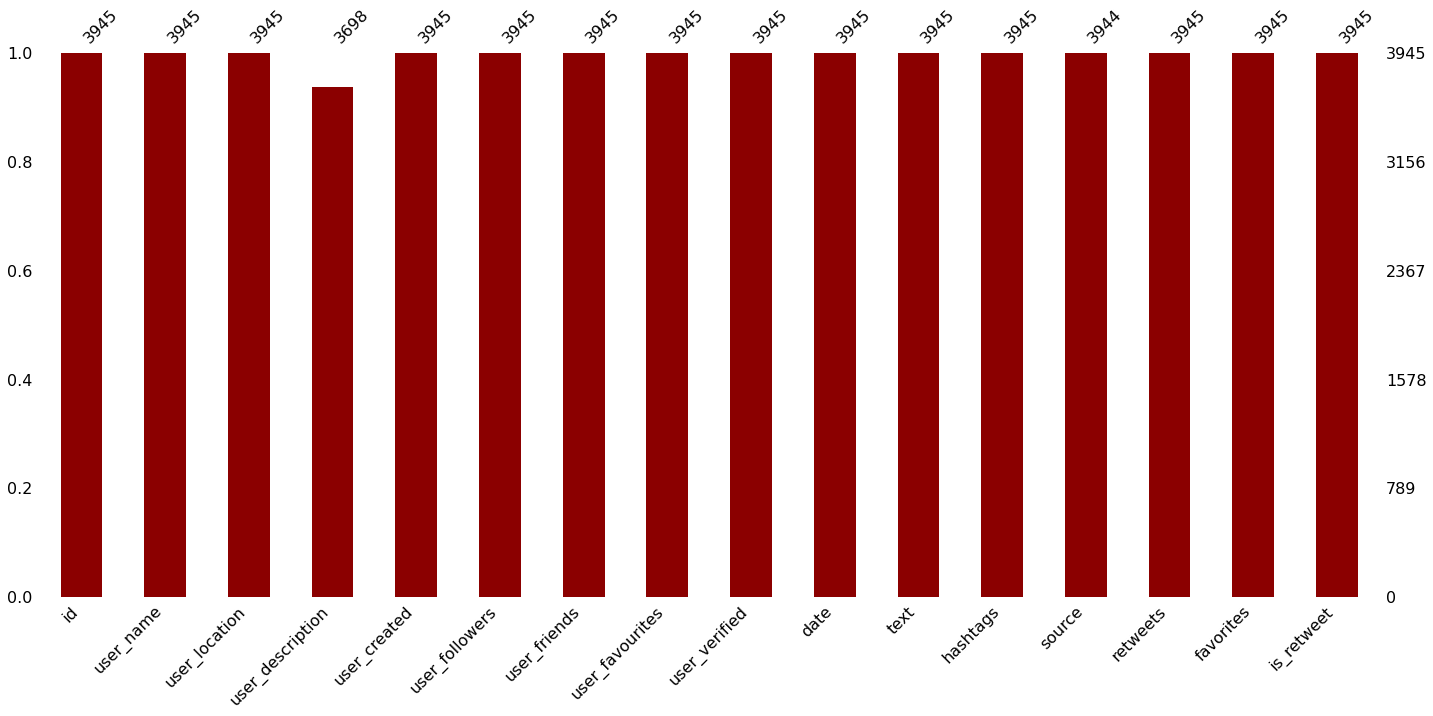

In [28]:
msno.bar(df,color='darkred')

# Data is now Cleaned!

# User Created and Date column Data Type

In [29]:
df['user_created'] = pd.to_datetime(df['user_created'])
df['date']=pd.to_datetime(df['date'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3945 entries, 0 to 3944
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                3945 non-null   int64         
 1   user_name         3945 non-null   object        
 2   user_location     3945 non-null   object        
 3   user_description  3698 non-null   object        
 4   user_created      3945 non-null   datetime64[ns]
 5   user_followers    3945 non-null   int64         
 6   user_friends      3945 non-null   int64         
 7   user_favourites   3945 non-null   int64         
 8   user_verified     3945 non-null   bool          
 9   date              3945 non-null   datetime64[ns]
 10  text              3945 non-null   object        
 11  hashtags          3945 non-null   object        
 12  source            3944 non-null   object        
 13  retweets          3945 non-null   int64         
 14  favorites         3945 n

# We will now begin our Analysis!

In [31]:
df['date']=df['date'].dt.date

In [33]:
date = df.groupby('date').count().reset_index()

Text(0, 0.5, 'Number of Tweets')

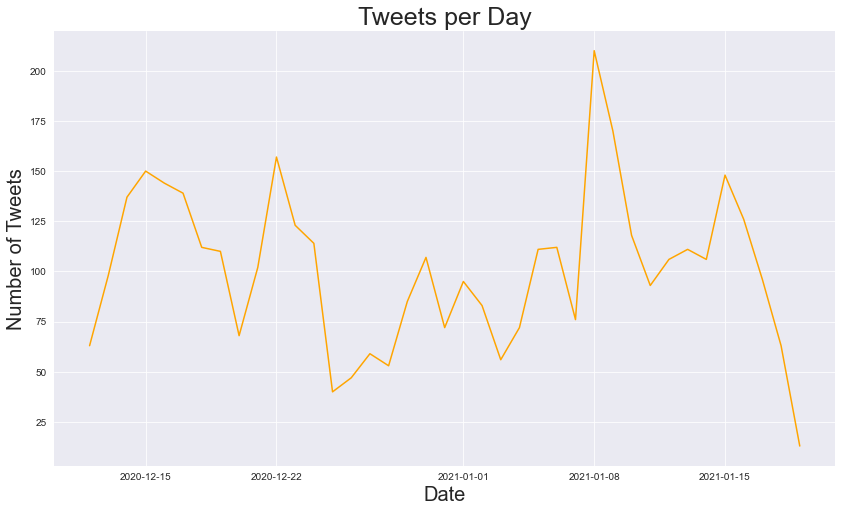

In [47]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,8))
g=sns.lineplot(x='date', y='id', data=date, color='orange', markers="o")
sns.despine(left=True)
g.set_title('Tweets per Day', fontsize=25)
g.set_xlabel('Date', fontsize=20)
g.set_ylabel('Number of Tweets', fontsize=20)

In [48]:
htags = pd.DataFrame(df['hashtags'].value_counts()).reset_index()
htags = htags[htags['index'] != 'No HashTag']
htags = htags.rename(columns={'index': 'Hashtags', 'hashtags': 'counts'})[:10]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

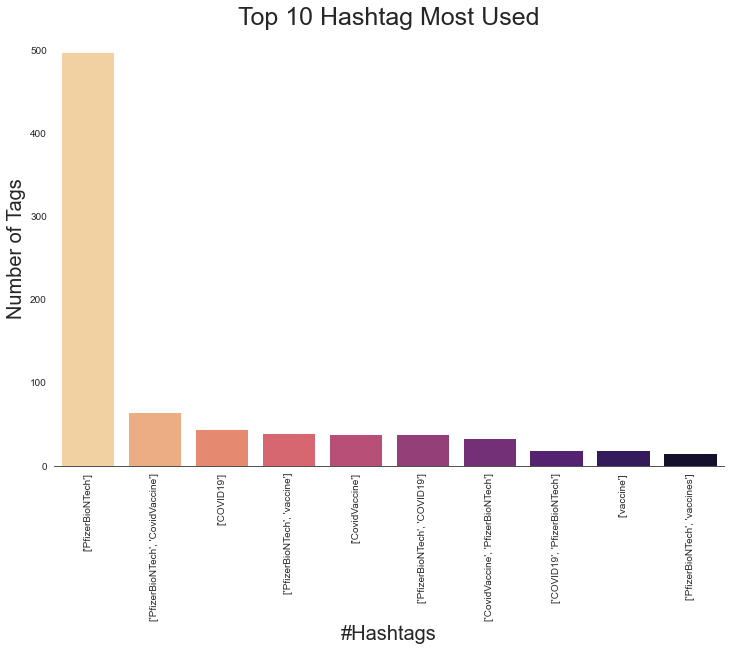

In [49]:
sns.set_style('white')
plt.figure(figsize=(12,8))
h=sns.barplot(x='Hashtags', y='counts', data=htags, palette='magma_r')
sns.despine(left=True)
h.set_title('Top 10 Hashtag Most Used', fontsize=25)
h.set_xlabel('#Hashtags', fontsize=20)
h.set_ylabel('Number of Tags', fontsize=20)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

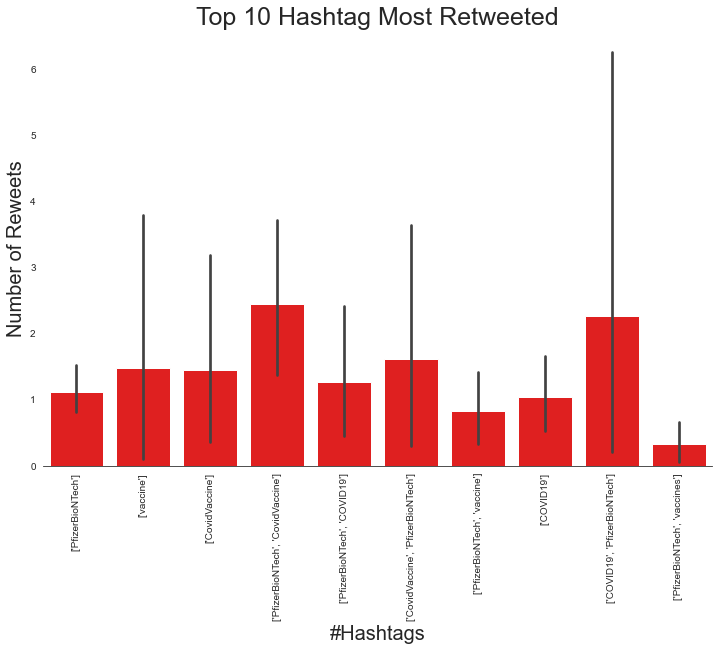

In [52]:
top_10 = htags['Hashtags']
retweet = df[df['hashtags'].isin(top_10)]

sns.set_style('white')
plt.figure(figsize=(12,8))
k=sns.barplot(x='hashtags', y='retweets', data=retweet, color='red')
sns.despine(left=True)
k.set_title('Top 10 Hashtag Most Retweeted', fontsize=25)
k.set_xlabel('#Hashtags', fontsize=20)
k.set_ylabel('Number of Reweets', fontsize=20)
plt.xticks(rotation=90)

In [53]:
df['user_created'] = df['user_created'].dt.date

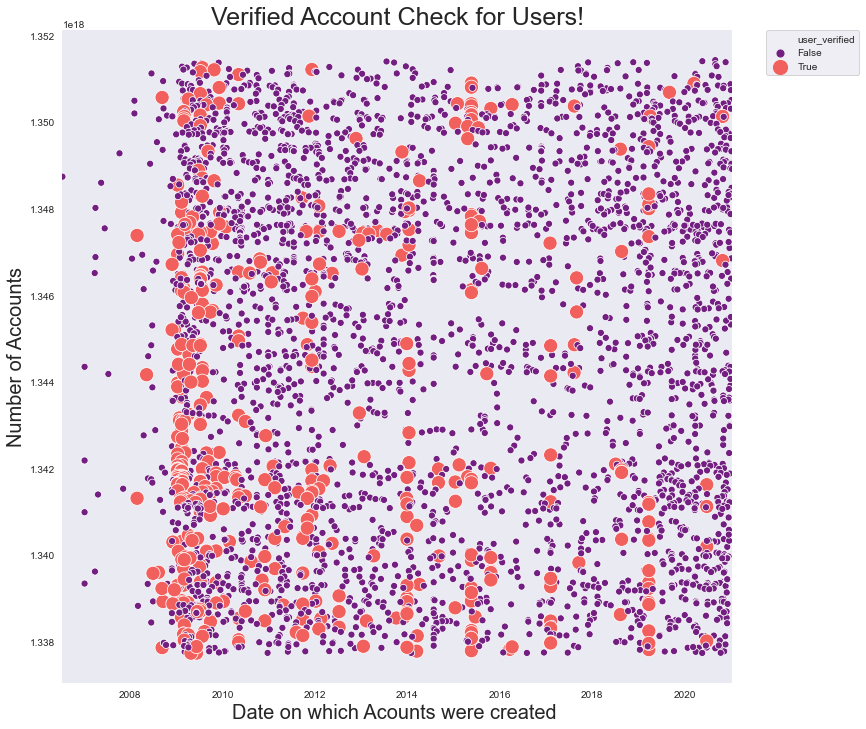

In [54]:
sns.set_style('dark')
plt.figure(figsize=(12,12))
b = sns.scatterplot(x='user_created', y='id', data=df, palette='magma', hue='user_verified', size='user_verified', sizes= (50,200), size_order=[True, False])
sns.despine(left=True)
b.set_title('Verified Account Check for Users!', fontsize=25)
b.set_xlabel('Date on which Acounts were created ', fontsize=20)
b.set_ylabel('Number of Accounts', fontsize=20)
#plt.xticks(rotation=90)
b.set_xlim(df['user_created'].min(),df['user_created'].max())
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [55]:
top_10_df = df[df['hashtags'].isin(top_10)]

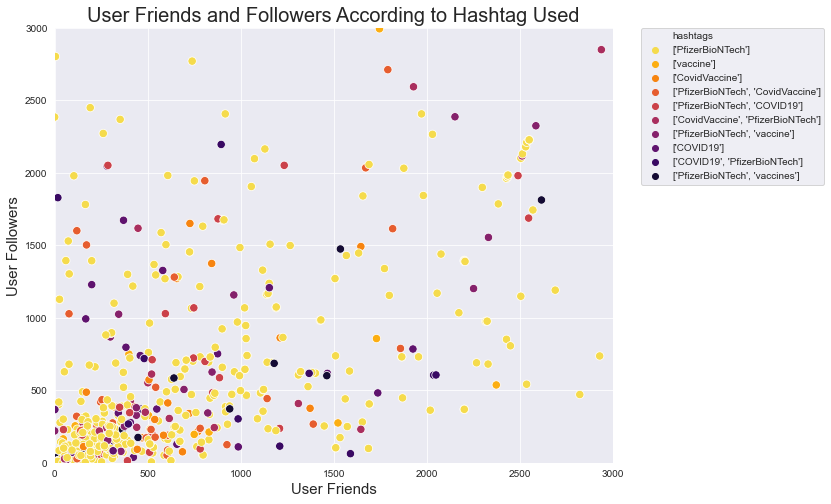

In [56]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
j = sns.scatterplot(x='user_friends', y='user_followers', data=top_10_df, hue='hashtags', palette='inferno_r', s=70)
j.set_xlabel('User Friends', fontsize=15)
j.set_ylabel('User Followers', fontsize=15)
j.set_title('User Friends and Followers According to Hashtag Used', fontsize=20)
sns.despine(left=True)
plt.xlim(0,3000)
plt.ylim(top_10_df['user_friends'].min(),3000)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [57]:
top_source = top_10_df['source'].value_counts()
top_source = pd.DataFrame(top_source).reset_index()

Text(0.5, 1.0, 'Sources Used for Tweets')

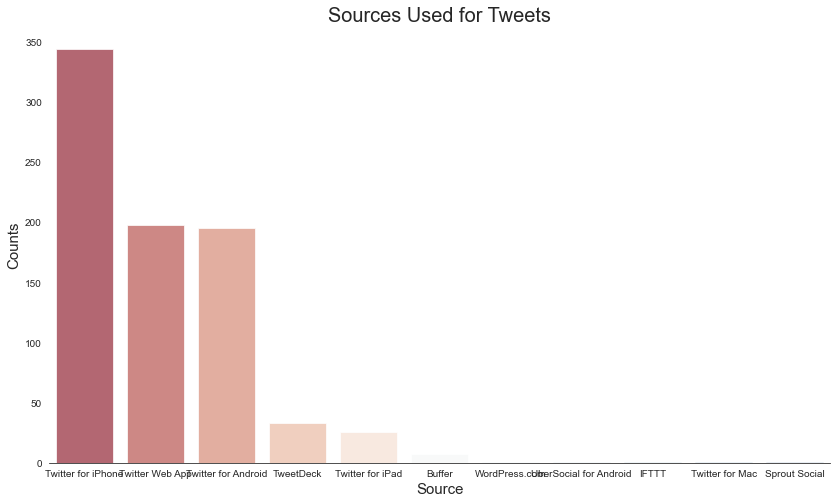

In [58]:
sns.set_style('white')
plt.figure(figsize=(14,8))
o = sns.barplot(data=top_source, x='index', y='source', alpha=0.7, palette='RdBu')
sns.despine(left=True)
o.set_xlabel('Source', fontsize=15)
o.set_ylabel('Counts', fontsize=15)
o.set_title('Sources Used for Tweets', fontsize=20)

In [59]:
df.sort_values(ascending=False, by='retweets')[:30][['id','user_name', 'user_verified', 'text', 'retweets']]

,id,user_name,user_verified,text,retweets
3297,1350535798366547969,The Epoch Times,True,55 people in the US have died after receiving ...,688
3,1337855739918835717,Charles Adler,True,"Facts are immutable, Senator, even when you're...",446
183,1338287664454393858,Anita Anand,True,Welcoming the 1st #COVID19vaccines to 🇨🇦 tonig...,284
3006,1348068786587500547,Anita Anand,True,🇨🇦 has received &amp; distributed over half a ...,230
2828,1347921247083122689,Chris Ship,True,A Palace source said the vaccines were adminis...,199
922,1340456887817560065,The Epoch Times,True,The @US_FDA is investigating around 5 allergic...,176
793,1340304234416381954,Senator Shehu Sani,True,The Western media deliberately down played or ...,115
3179,1351092932812660741,Monica Chopra Jagtap,False,Display board in Ireland says it all. It’s a m...,109
1125,1342227972649054208,Marika Ntrekos,False,LETHAL INJECTION 💉 🤣\n\n#PfizerBioNTech #pfize...,104
1591,1342823345801277443,"Nataniel Lester-Coll, MD",True,Nice comparison of the #PfizerBioNTech and #Mo...,80


In [60]:
df_1 = df[(df['user_verified'] == True) & (df['hashtags'] != 'No HashTag') &(df['hashtags'].isin(top_10))]
df_1 = df_1.groupby('hashtags').sum().sort_values(ascending=False, by='retweets').reset_index()

In [61]:
df_1

,hashtags,id,user_followers,user_friends,user_favourites,user_verified,retweets,favorites,is_retweet
0,['PfizerBioNTech'],5.374776e+19,21656760.0,41282.0,465607.0,40.0,194.0,1303.0,0.0
1,"['PfizerBioNTech', 'CovidVaccine']",1.745602e+19,354481.0,10783.0,174928.0,13.0,75.0,395.0,0.0
2,"['COVID19', 'PfizerBioNTech']",1.341735e+18,601930.0,1161.0,531.0,1.0,35.0,99.0,0.0
3,['COVID19'],5.364821e+18,327968.0,17153.0,1452.0,4.0,17.0,63.0,0.0
4,"['PfizerBioNTech', 'vaccine']",6.716603e+18,2484648.0,6446.0,49742.0,5.0,14.0,72.0,0.0
5,"['CovidVaccine', 'PfizerBioNTech']",4.021571e+18,497672.0,4057.0,14250.0,3.0,6.0,15.0,0.0
6,"['PfizerBioNTech', 'COVID19']",5.369350e+18,70574.0,5615.0,11319.0,4.0,4.0,26.0,0.0
7,['vaccine'],5.351320e+18,426701.0,1871.0,2545.0,4.0,1.0,3.0,0.0
8,['CovidVaccine'],1.340370e+18,3824.0,2247.0,3614.0,1.0,0.0,20.0,0.0


(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 <a list of 11 Text major ticklabel objects>)

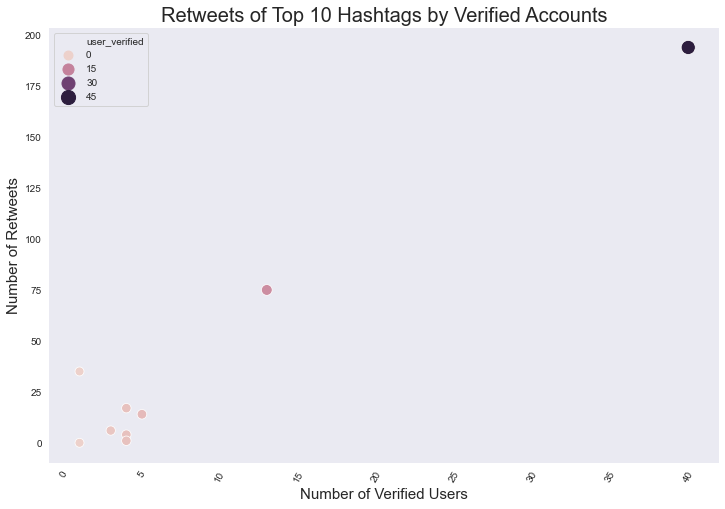

In [62]:
sns.set_style('dark')
plt.figure(figsize=(12,8))
#sns.lineplot(y='user_verified', x='hashtags', data=df_1, color='orange')
s = sns.scatterplot(y='retweets', x='user_verified', data=df_1, hue='user_verified', size='user_verified', sizes=(80,200))
sns.despine(left=True)
s.set_xlabel('Number of Verified Users', fontsize=15)
s.set_ylabel('Number of Retweets', fontsize=15)
s.set_title('Retweets of Top 10 Hashtags by Verified Accounts', fontsize=20)
plt.xticks(rotation=60)